In [6]:
import zntrack
import numpy as np
import matplotlib.pyplot as plt
import ase
import matplotlib
import pandas as pd
import znh5md
import ipsuite
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
plt.rcParams['text.usetex'] = True

In [3]:
data = zntrack.from_rev("DataGeneration_ShuffleAndSelect")

2024-11-09 20:56:59,779 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


In [4]:
test = data.test_frames
train = data.train_frames
valid = data.validate_frames

In [5]:
test_psi = []
test_phi = []
for atom in test:
    psi = np.deg2rad(atom.get_dihedral(6,4,2,1))
    phi = np.deg2rad(atom.get_dihedral(7,6,4,2))
    if psi>np.pi:
        psi = psi-2*np.pi
    if phi>np.pi:
        phi = phi-2*np.pi
    test_psi.append(psi)
    test_phi.append(phi)

train_psi = []
train_phi = []
for atom in train:
    psi = np.deg2rad(atom.get_dihedral(6,4,2,1))
    phi = np.deg2rad(atom.get_dihedral(7,6,4,2))
    if psi>np.pi:
        psi = psi-2*np.pi
    if phi>np.pi:
        phi = phi-2*np.pi
    train_psi.append(psi)
    train_phi.append(phi)

valid_psi = []
valid_phi = []
for atom in valid:
    psi = np.deg2rad(atom.get_dihedral(6,4,2,1))
    phi = np.deg2rad(atom.get_dihedral(7,6,4,2))
    if psi>np.pi:
        psi = psi-2*np.pi
    if phi>np.pi:
        phi = phi-2*np.pi
    valid_psi.append(psi)
    valid_phi.append(phi)

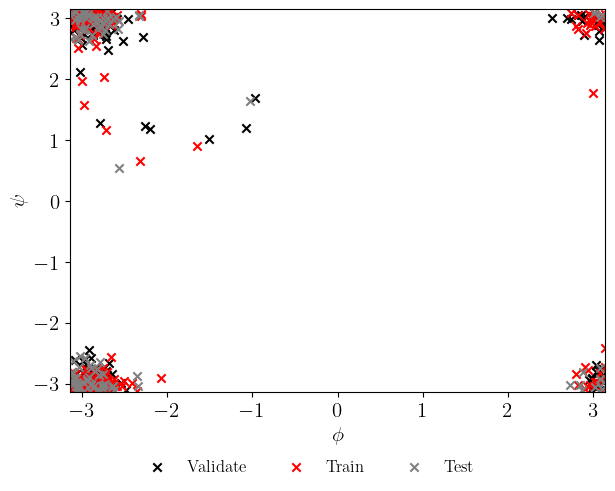

In [6]:
fig, ax = plt.subplots()

ax.scatter(valid_phi, valid_psi, label="Validate", color="black", marker="x")
ax.scatter(train_phi, train_psi, label="Train", color="red", marker="x")
ax.scatter(test_phi, test_psi, label="Test", color="gray", marker="x")

ax.set_xlabel("$\phi$")
ax.set_ylabel("$\psi$")
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
fig.tight_layout()
fig.legend(bbox_to_anchor=(0, 0, 1, 0), loc='center', ncol=3, fontsize=12, frameon=False)

In [6]:
data = pd.read_csv("/ssd/jpeters/model_training/nodes/RTL/TransferLearning/Apax/apax_model/log.csv")

Text(0, 0.5, 'Validation Loss')

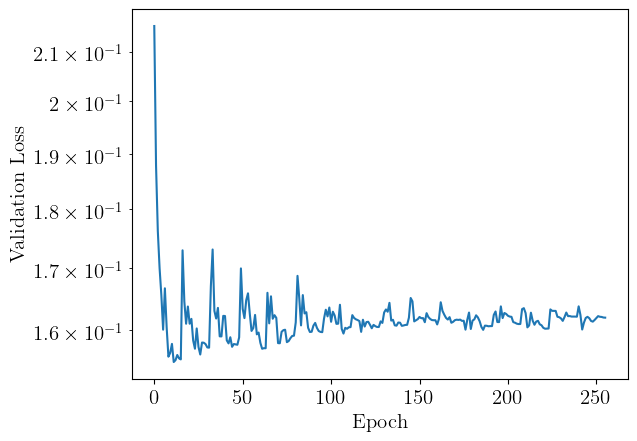

In [7]:
plt.plot(data["epoch"], data["val_loss"])
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")

In [9]:
traj_good = znh5md.IO("data/md_good.h5")[:]
traj_bad = znh5md.IO("data/md_bad.h5")[:]

In [10]:
print(traj_bad[0].calc.results["energy_uncertainty"])

0.10243197415471889


In [11]:
energies_good = []
energies_bad = []
un_bad = []
un_good = []
f_bad = []
f_good = []
f_max = []
for i in range(len(traj_good)):
    e = traj_good[i].calc.results["energy"]
    u = traj_good[i].calc.results["energy_uncertainty"]
    f = traj_good[i].calc.results["forces_uncertainty"]
    f_max_val = traj_good[i].calc.results["forces"]
    energies_good.append(e)
    un_good.append(u)
    f_good.append(np.max(f))
    f_max.append(np.max(f_max_val))

for i in range(len(traj_bad)):
    e = traj_bad[i].calc.results["energy"]
    u = traj_bad[i].calc.results["energy_uncertainty"]
    f = traj_bad[i].calc.results["forces_uncertainty"]
    energies_bad.append(e)
    un_bad.append(u)
    f_bad.append(np.max(f))

In [12]:
print(np.max(f_max))

2.852013762258025


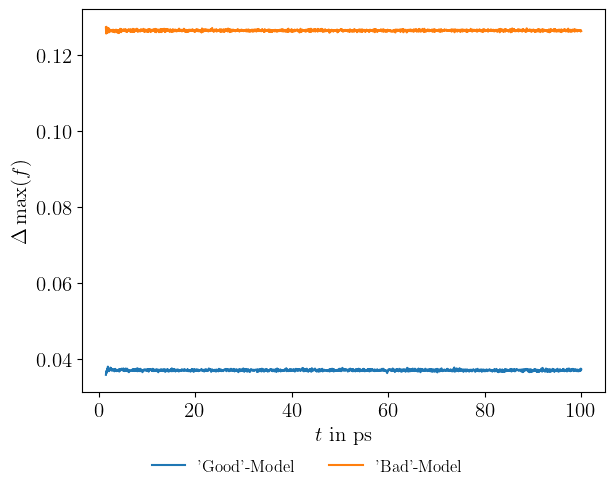

In [13]:
fig, ax = plt.subplots()
t_good = np.linspace(0, 100, len(energies_good))
t_bad = np.linspace(0, 100, len(energies_bad))
#ax.plot(t_good[30:], energies_good[30:], label="'Good'-Model")
#ax.plot(t_bad[30:], energies_bad[30:], label="'Bad'-Model")
#ax.plot(t_good[30:], un_good[30:], label="'Good'-Model")
#ax.plot(t_bad[30:], un_bad[30:], label="'Bad'-Model")
ax.plot(t_good[30:], f_good[30:], label="'Good'-Model")
ax.plot(t_bad[30:], f_bad[30:], label="'Bad'-Model")
ax.set_xlabel("$t$ in ps")
#ax.set_ylabel("$E_\mathrm{pot}$")
#ax.set_ylabel("$\Delta E_\mathrm{pot}$")
ax.set_ylabel("$\Delta \max(f)$")
fig.tight_layout()
fig.legend(bbox_to_anchor=(0, 0, 1, 0), loc='center', ncol=3, fontsize=12, frameon=False)

# MD Analysis

In [14]:
data = zntrack.from_rev("MD_ApaxJaxMD")

/tikhome/jpeters/miniconda3/envs/BA/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
I0000 00:00:1731182225.066097  613089 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [15]:
md_psi = []
md_phi = []
md_energy = []

for atom in data.atoms:
    psi = np.deg2rad(atom.get_dihedral(6,4,2,1))
    phi = np.deg2rad(atom.get_dihedral(7,6,4,2))
    md_energy.append(atom.calc.results["energy"])
    if psi>np.pi:
        psi = psi-2*np.pi
    if phi>np.pi:
        phi = phi-2*np.pi
    md_psi.append(psi)
    md_phi.append(phi)

Text(0, 0.5, 'Potential Energy')

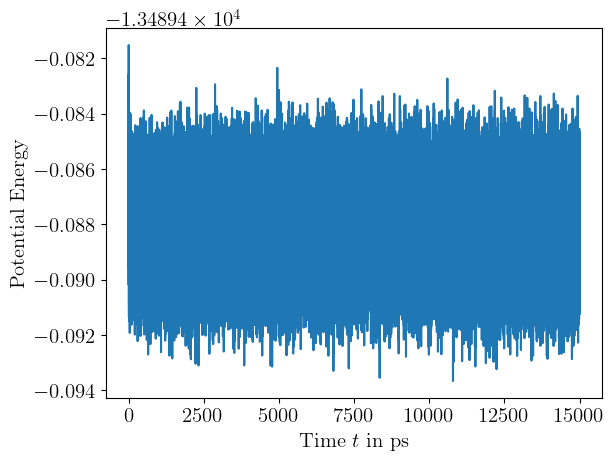

In [16]:
t = np.linspace(0, 15_000, len(md_energy))
plt.plot(t[30:], md_energy[30:])
plt.xlabel("Time $t$ in ps")
plt.ylabel("Potential Energy")

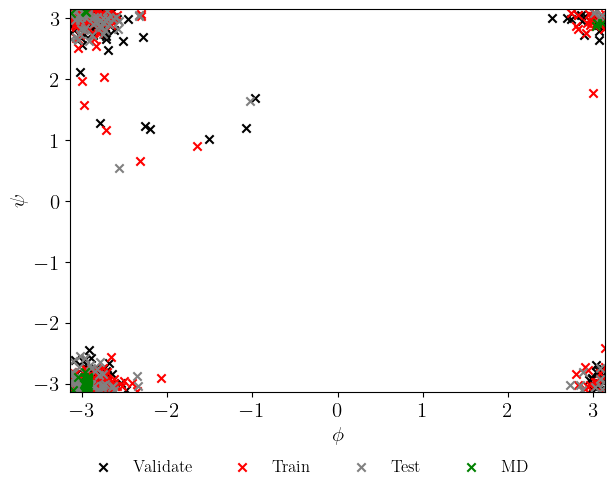

In [17]:
fig, ax = plt.subplots()

ax.scatter(valid_phi, valid_psi, label="Validate", color="black", marker="x")
ax.scatter(train_phi, train_psi, label="Train", color="red", marker="x")
ax.scatter(test_phi, test_psi, label="Test", color="gray", marker="x")
ax.scatter(md_phi, md_psi, label="MD", color="green", marker="x")

ax.set_xlabel("$\phi$")
ax.set_ylabel("$\psi$")
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
fig.tight_layout()
fig.legend(bbox_to_anchor=(0, 0, 1, 0), loc='center', ncol=4, fontsize=12, frameon=False)

In [20]:
traj = znh5md.IO("data/enhanced_md.h5")[:]

In [21]:
e = [traj[i].calc.results["energy"] for i in range(len(traj))]

In [23]:
print(e[200:220])

[array([-13488.64825887]), array([-13488.11448651]), array([-13488.42869654]), array([-13488.46489185]), array([-13488.19424733]), array([-13488.66665304]), array([-13488.49549693]), array([-13488.10099129]), array([-13488.25611452]), array([-13488.5891274]), array([-13488.45150613]), array([-13488.09599381]), array([-13488.62092156]), array([-13488.51618627]), array([-13488.31104843]), array([-13488.04365073]), array([-13488.53054708]), array([-13488.44961529]), array([-13488.39628251]), array([-13487.24476937])]


In [7]:
data = zntrack.from_rev("DataGeneration_ShuffleAndSelect")

In [8]:
data.train_frames[0].calc.results.keys()

dict_keys(['forces', 'dipole', 'free_energy', 'energy'])